In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cars_info.csv")

In [3]:
df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [4]:
df.drop("ID", axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              17048 non-null  object
 1   Price             17048 non-null  int64 
 2   Brand             17048 non-null  object
 3   Model             17048 non-null  object
 4   Variant           17048 non-null  object
 5   Series            17048 non-null  object
 6   Year              17048 non-null  int64 
 7   Kilometers        17048 non-null  int64 
 8   Type              17048 non-null  object
 9   Gearbox           17048 non-null  object
 10  Fuel              17048 non-null  object
 11  Status            17048 non-null  object
 12  CC                17048 non-null  int64 
 13  Color             17048 non-null  object
 14  Seating Capacity  17048 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 2.0+ MB


In [6]:
df["Name"]

0                        2010 Toyota Rukus Build 2 AZE151R
1        2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...
2        2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...
3               2010 Mercedes-Benz E250 CDI Avantgarde 207
4                             2016 Holden Cruze CD JH MY16
                               ...                        
17043                   2003 Holden Commodore Executive VY
17044                          2008 Toyota Yaris YR NCP90R
17045                 2002 Holden Jackaroo SE LWB (4X4) U8
17046                 2016 Hyundai I30 Active GD4 Series 2
17047                2005 Toyota RAV4 Cruiser (4X4) ACA23R
Name: Name, Length: 17048, dtype: object

In [7]:
df.duplicated().sum()

65

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop("Name", axis=1, inplace=True)

In [11]:
df.head()

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [12]:
df["Price"] = df.Price * 55.04

In [13]:
df.sample(5)

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
6059,1486024.96,Toyota,Corolla,Ascent Sport,Mzea12R,2018,57260,Hatchback,Automatic,Unleaded Petrol,Used,1987,White,5
8908,825049.60,Peugeot,208,Allure,MY18,2018,116488,Hatchback,Automatic,Premium Unleaded Petrol,Used,1199,White,5
88,4617195.52,Audi,S7,Sportback 4.0 Tfsi,4G MY17,2016,42983,Hatchback,Automatic,Premium Unleaded Petrol,Used,3993,Silver,4
8417,1375724.80,Mitsubishi,Outlander,ES 7 Seat (2WD),ZL MY18.5,2017,164424,Wagon,Automatic,Unleaded Petrol,Used,2360,White,7
6279,7484889.60,Volkswagen,Touareg,210TDI R-Line,CR MY22,2022,10,Wagon,Automatic,Diesel,New In Stock,2967,Silver,5


In [14]:
np.round(df["Price"].describe())

count       16983.0
mean      2023333.0
std       1669638.0
min         55040.0
25%       1034724.0
50%       1650650.0
75%       2531290.0
max      54984960.0
Name: Price, dtype: float64

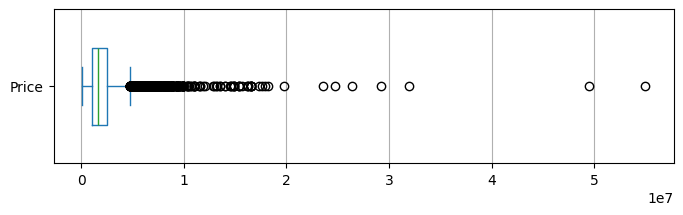

In [15]:
plt.figure(figsize=(8, 2))
df["Price"].plot.box(vert=False, widths=0.5)
plt.grid(axis="x")
plt.show()

In [16]:
df["Price"].quantile([0.9, 0.95, 0.97, 0.975, 0.99])

0.900    3731579.904
0.950    4677849.600
0.970    5503449.600
0.975    6045373.440
0.990    7484988.672
Name: Price, dtype: float64

In [17]:
df = df[df["Price"]<=6045373.440]

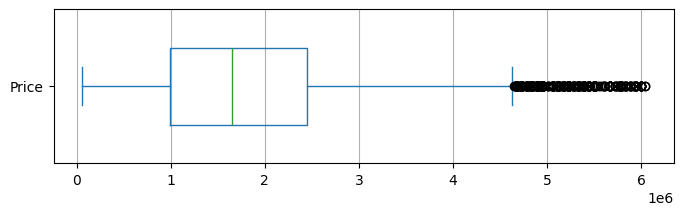

In [18]:
plt.figure(figsize=(8, 2))
df["Price"].plot.box(vert=False, widths=0.5)
plt.grid(axis="x")
plt.show()

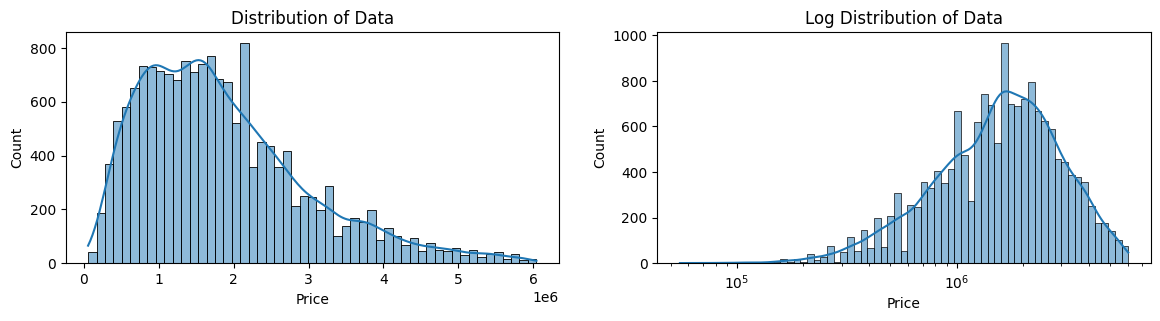

In [19]:
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
sns.histplot(df["Price"], kde=True)
plt.title("Distribution of Data")

plt.subplot(1, 2, 2)
sns.histplot(df["Price"], kde=True, log_scale=True)
plt.title("Log Distribution of Data")
plt.show()

In [20]:
df.head()

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,550344.96,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
2,4402649.60,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,1925849.60,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,880089.60,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
5,1475072.00,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Unleaded Petrol,Used,2488,White,5


In [21]:
brand_count = df["Brand"].value_counts().reset_index()
brand_count

,Brand,count
0,Toyota,2648
1,Holden,1498
2,Ford,1487
3,Mazda,1164
4,Hyundai,1086
5,Mitsubishi,1072
6,Nissan,1004
7,Volkswagen,991
8,Kia,742
9,Subaru,654


In [22]:
low_brand_count = brand_count[brand_count["count"]<=100]["Brand"].values

In [23]:
low_brand_count

array(['MG', 'Mini', 'Porsche', 'Peugeot', 'Chrysler', 'Jaguar', 'HSV',
       'GWM', 'Great Wall', 'Fiat', 'Dodge', 'Ram', 'Citroen',
       'Alfa Romeo', 'Ssangyong', 'Infiniti', 'Haval', 'Maserati',
       'Abarth', 'Cupra', 'Foton', 'Opel', 'Saab', 'Chery', 'Genesis',
       'FPV', 'Mitsubishi Fuso', 'Hino', 'Iveco', 'Mahindra', 'Bentley',
       'Smart', 'Proton'], dtype=object)

In [24]:
df = df[~(df["Brand"].isin(low_brand_count))]

In [25]:
df["Brand"].value_counts()

Brand
Toyota           2648
Holden           1498
Ford             1487
Mazda            1164
Hyundai          1086
Mitsubishi       1072
Nissan           1004
Volkswagen        991
Kia               742
Subaru            654
Mercedes-Benz     539
Audi              473
BMW               441
Honda             412
Jeep              374
Isuzu             267
Land Rover        240
Lexus             173
Suzuki            160
Skoda             158
Volvo             155
Renault           150
LDV               116
Name: count, dtype: int64

In [26]:
df["Year"].min(), df["Year"].max()

(1989, 2022)

In [27]:
df = df[df["Year"]>=2010]

In [28]:
df["Year"].min(), df["Year"].max()

(2010, 2022)

In [29]:
df["Kilometers"].describe()

count     14082.000000
mean      92255.422170
std       66139.794779
min           2.000000
25%       42792.250000
50%       81362.000000
75%      132065.500000
max      583000.000000
Name: Kilometers, dtype: float64

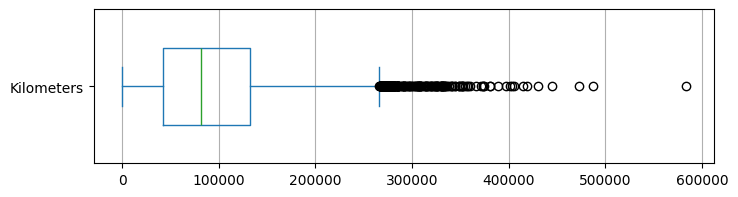

In [30]:
plt.figure(figsize=(8, 2))
df["Kilometers"].plot.box(vert=False, widths=0.5)
plt.grid(axis="x")
plt.show()

In [31]:
df = df[df["Kilometers"]<=300000]

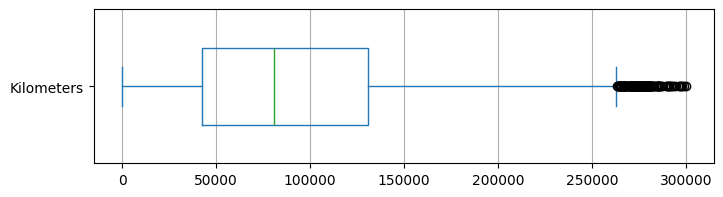

In [32]:
plt.figure(figsize=(8, 2))
df["Kilometers"].plot.box(vert=False, widths=0.5)
plt.grid(axis="x")
plt.show()

In [33]:
df.head()

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,550344.96,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
2,4402649.60,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,1925849.60,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,880089.60,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
5,1475072.00,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Unleaded Petrol,Used,2488,White,5


In [34]:
df["Type"].value_counts()

Type
Wagon                    6651
Hatchback                2015
Sedan                    1602
Dual Cab Utility          634
Double Cab Pick Up        422
Coupe                     339
Cab Chassis               331
Van                       315
Dual Cab Pick-up          306
Crew Cab Pickup           234
Double Cab Utility        175
Crew Cab Utility          170
Sportswagon               126
Utility                   108
Crew Cab Chassis           75
Dual Cab Chassis           67
Double Cab Chassis         60
Fastback                   34
Hardtop                    34
Sportback                  31
Liftback                   31
Softtop                    30
Convertible                24
Super Cab Utility          22
Space Cab Chassis          20
Cabriolet                  20
Super Cab Chassis          16
Bus                        14
Space Cab Utility          10
Freestyle Cab Chassis      10
X Cab Pickup                8
X Cab Cab Chassis           7
King Cab Pickup             6
Space

In [35]:
df["Gearbox"].value_counts()

Gearbox
Automatic    12267
Manual        1711
AWD             13
Front            4
Name: count, dtype: int64

In [36]:
df = df[df["Gearbox"].isin(["Automatic", "Manual"])]

In [37]:
df["Gearbox"].value_counts()

Gearbox
Automatic    12267
Manual        1711
Name: count, dtype: int64

In [38]:
df["Fuel"]

0                Unleaded Petrol
2                         Diesel
3                         Diesel
4                Unleaded Petrol
5                Unleaded Petrol
                  ...           
17039    Premium Unleaded Petrol
17040            Unleaded Petrol
17041                     Diesel
17042                     Diesel
17046            Unleaded Petrol
Name: Fuel, Length: 13978, dtype: object

In [39]:
df["Fuel"] = df["Fuel"].str.replace("Unleaded Petrol/Electric", "Hybrid")
df["Fuel"] = df["Fuel"].str.replace("Premium Unleaded/Electric", "Hybrid")
df["Fuel"] = df["Fuel"].str.replace("Diesel/Electric", "Hybrid")
df["Fuel"] = df["Fuel"].str.replace("Unleaded Petrol", "Petrol")
df["Fuel"] = df["Fuel"].str.replace("Premium Unleaded Petrol", "Premium Petrol")

In [40]:
df["Fuel"].value_counts()

Fuel
Petrol                  5630
Diesel                  5296
Premium Petrol          2625
Hybrid                   402
Liquid Petroleum Gas      25
Name: count, dtype: int64

In [42]:
df["Status"].value_counts()

Status
Used            13368
Demo              326
New In Stock      284
Name: count, dtype: int64

In [43]:
df["CC"].describe()

count    13978.000000
mean      2403.523680
std        779.763707
min        898.000000
25%       1987.000000
50%       2199.000000
75%       2776.000000
max       6424.000000
Name: CC, dtype: float64

In [46]:
df["Color"].value_counts()

Color
White        5340
Grey         2078
Silver       1902
Black        1534
Blue         1272
             ... 
Baige           1
Sparkling       1
Vitamin         1
Velvet          1
yellow          1
Name: count, Length: 187, dtype: int64

In [47]:
df["Seating Capacity"].describe()

count    13978.000000
mean         5.139433
std          1.088922
min          2.000000
25%          5.000000
50%          5.000000
75%          5.000000
max         14.000000
Name: Seating Capacity, dtype: float64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13978 entries, 0 to 17046
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13978 non-null  float64
 1   Brand             13978 non-null  object 
 2   Model             13978 non-null  object 
 3   Variant           13978 non-null  object 
 4   Series            13978 non-null  object 
 5   Year              13978 non-null  int64  
 6   Kilometers        13978 non-null  int64  
 7   Type              13978 non-null  object 
 8   Gearbox           13978 non-null  object 
 9   Fuel              13978 non-null  object 
 10  Status            13978 non-null  object 
 11  CC                13978 non-null  int64  
 12  Color             13978 non-null  object 
 13  Seating Capacity  13978 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 1.6+ MB


In [52]:
df.reset_index(drop=True, inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13978 entries, 0 to 13977
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13978 non-null  float64
 1   Brand             13978 non-null  object 
 2   Model             13978 non-null  object 
 3   Variant           13978 non-null  object 
 4   Series            13978 non-null  object 
 5   Year              13978 non-null  int64  
 6   Kilometers        13978 non-null  int64  
 7   Type              13978 non-null  object 
 8   Gearbox           13978 non-null  object 
 9   Fuel              13978 non-null  object 
 10  Status            13978 non-null  object 
 11  CC                13978 non-null  int64  
 12  Color             13978 non-null  object 
 13  Seating Capacity  13978 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 1.5+ MB


In [58]:
np.round(df.groupby("Brand")["Price"].mean().sort_values(ascending=False), decimals=2)

Brand
Mercedes-Benz    3046201.67
Land Rover       3033173.53
Lexus            2962758.93
Volvo            2882758.94
BMW              2786122.17
Audi             2466409.46
Isuzu            2388718.98
Toyota           2305104.79
Ford             2183073.58
Jeep             2171028.48
Skoda            2120944.60
LDV              2079848.17
Volkswagen       2071395.05
Renault          1890507.51
Mazda            1778613.36
Subaru           1744173.31
Mitsubishi       1737256.04
Kia              1693358.14
Nissan           1623849.84
Hyundai          1566858.36
Honda            1532622.21
Holden           1417680.74
Suzuki           1118910.85
Name: Price, dtype: float64

In [65]:
np.round(pd.pivot_table(df, columns="Year", index="Brand", values="Price", aggfunc="mean", fill_value=0))

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Brand,,,,,,,,,,,,,
Audi,1003919.0,990787.0,1262193.0,1419071.0,1855576.0,1781450.0,2271889.0,2556425.0,3084969.0,3409219.0,3623153.0,3773369.0,3793012.0
BMW,1224651.0,1189120.0,1353152.0,1375340.0,1891796.0,2048473.0,2429010.0,3025553.0,3372219.0,3713425.0,3735066.0,4216066.0,4174407.0
Ford,784739.0,852549.0,942562.0,1096912.0,1345116.0,1762677.0,1976516.0,2243763.0,2576142.0,2989284.0,3430553.0,3483946.0,3957599.0
Holden,790287.0,790169.0,885869.0,1122486.0,1227378.0,1418719.0,1736499.0,1898315.0,1812770.0,2129576.0,2570853.0,0.0,0.0
Honda,901066.0,718386.0,938946.0,930240.0,1101491.0,1329470.0,1389809.0,1620610.0,1784558.0,1924756.0,1905015.0,2210195.0,2421760.0
Hyundai,597718.0,674566.0,772495.0,875358.0,987500.0,1227288.0,1257041.0,1471504.0,1730951.0,1778855.0,2082213.0,2739886.0,2932447.0
Isuzu,0.0,1065795.0,1795336.0,1661046.0,1586528.0,1863806.0,1982092.0,2182666.0,2342677.0,2622733.0,2877695.0,3378591.0,3811781.0
Jeep,1163937.0,945873.0,1075398.0,1373853.0,1430215.0,1709547.0,1956923.0,2188078.0,2426417.0,3465860.0,4046482.0,3550323.0,3992187.0
Kia,663597.0,840446.0,687375.0,815408.0,902943.0,1246794.0,1464080.0,1630895.0,1839716.0,1873202.0,2068228.0,2602645.0,3224278.0


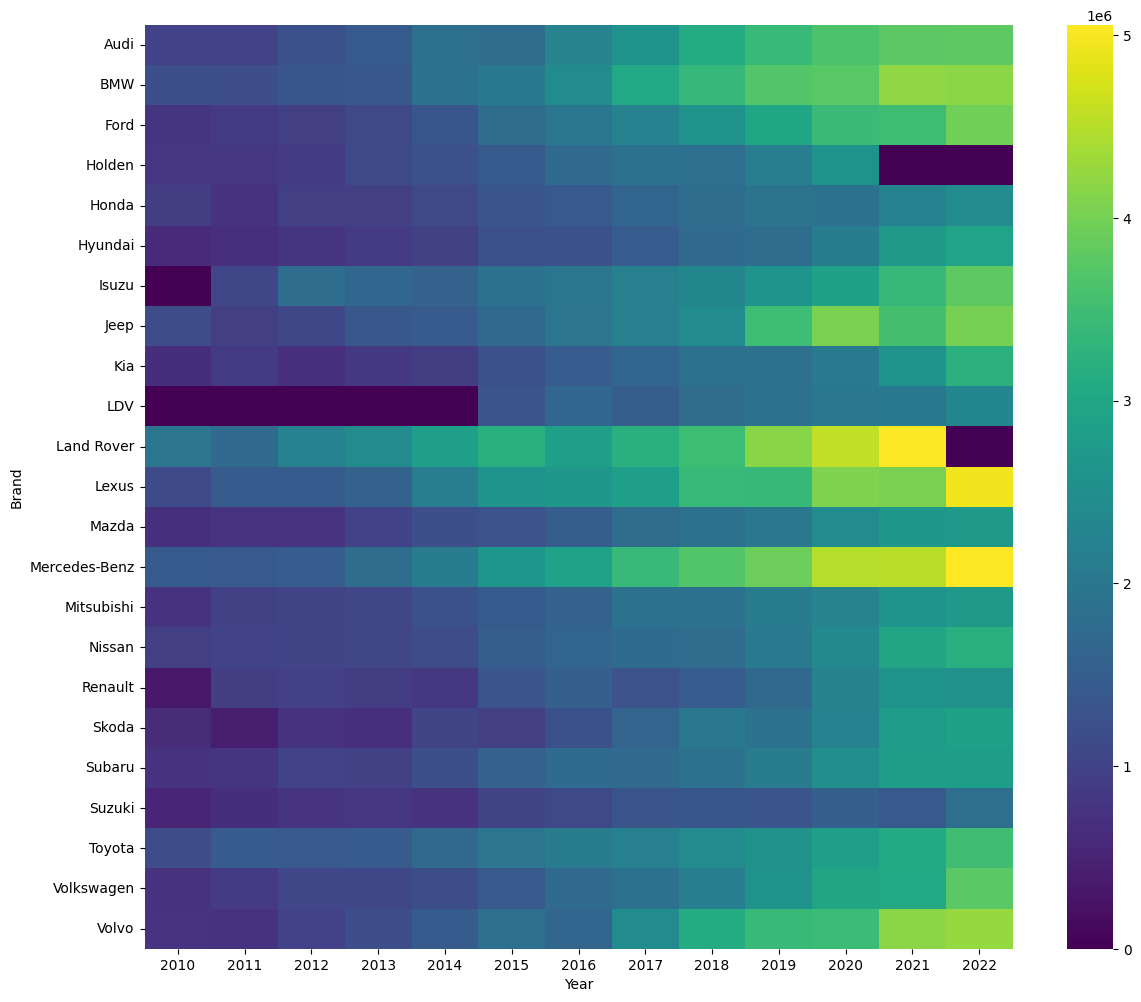

In [72]:
plt.figure(figsize=(14, 12))
sns.heatmap(np.round(pd.pivot_table(df, columns="Year", index="Brand", values="Price", 
                                    aggfunc="mean", fill_value=0)), cmap="viridis")
plt.show()

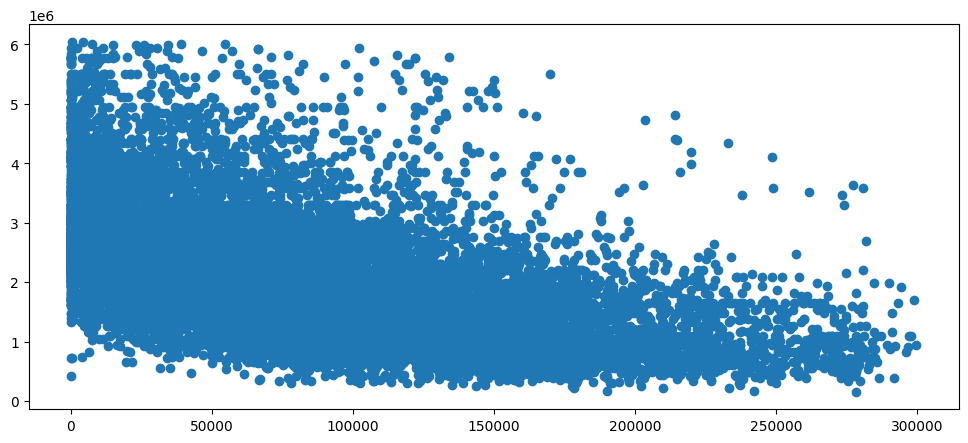

In [76]:
plt.figure(figsize=(12, 5))
plt.scatter(df["Kilometers"], df["Price"])
plt.show()

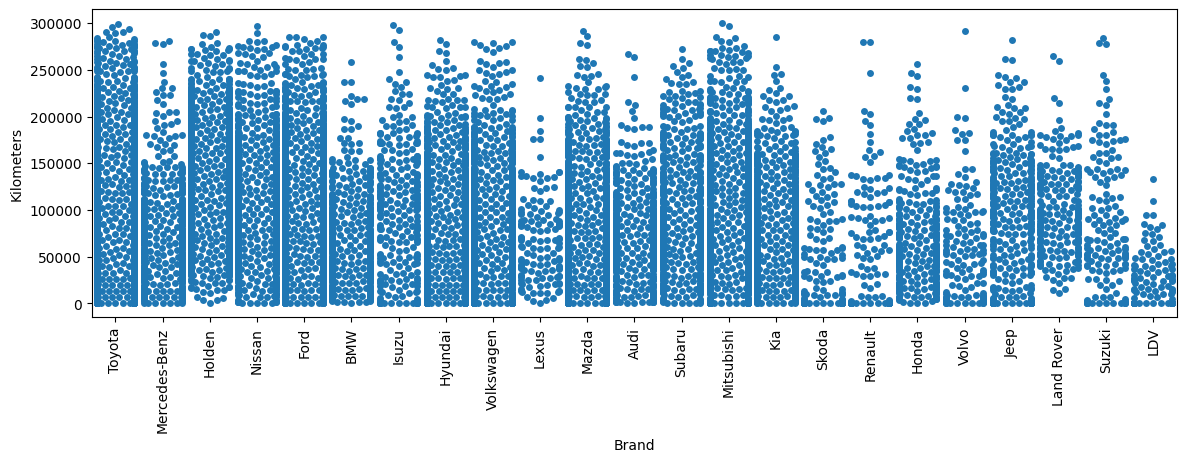

In [79]:
plt.figure(figsize=(14, 4))
sns.swarmplot(df, x="Brand", y="Kilometers")
plt.xticks(rotation=90)
plt.show()